In [33]:
import pandas as pd

In [34]:
df=pd.read_csv('../datasets/wine.csv')

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm
%matplotlib inline

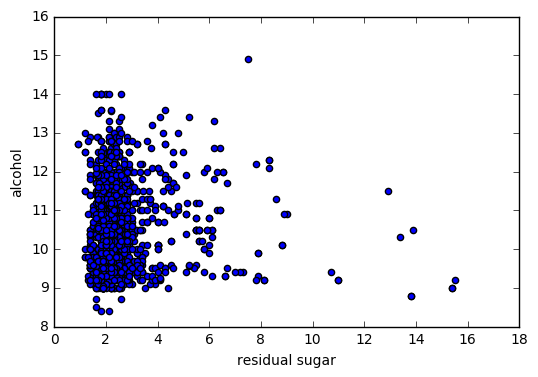

In [37]:
df.plot(kind='scatter', x='residual sugar', y='alcohol')

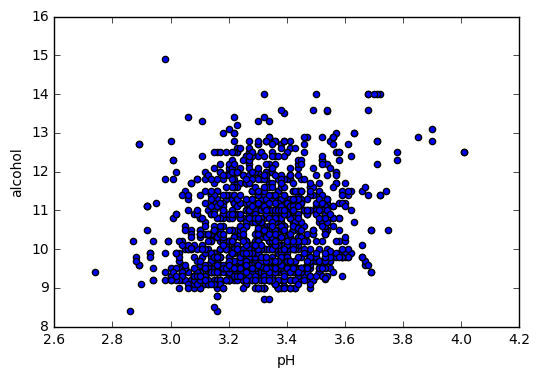

In [38]:
df.plot(kind='scatter', x='pH', y='alcohol')

In [39]:
x=df.drop('quality', axis=1)
y=df.quality

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
x_standard=StandardScaler().fit_transform(x)

In [42]:
k=8
kmeans=KMeans(n_clusters=k)
kmeans.fit(x_standard)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [43]:
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

In [44]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [45]:
predictions=kmeans.predict(x_standard)

In [46]:
y.head()
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [47]:
from sklearn.metrics import accuracy_score, silhouette_score

In [48]:
pd.Series(predictions).value_counts()

3    359
1    309
4    251
6    229
2    225
0    164
7     34
5     28
dtype: int64

In [49]:
accuracy_score(y, predictions)

0.093183239524702935

In [50]:
df=df.join(pd.DataFrame(predictions, columns=['clusters8']))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3


In [51]:
df.groupby('clusters8')['quality'].value_counts()

clusters8  quality
0          6           99
           5           31
           7           25
           4            5
           8            4
1          5          208
           6           87
           7            9
           4            4
           3            1
2          6          108
           7           87
           5           19
           8            9
           4            2
3          5          191
           6          116
           4           28
           7           17
           3            7
4          5          135
           6           97
           4           10
           7            9
5          5           17
           6            9
           4            1
           7            1
6          6          110
           5           64
           7           46
           8            5
           3            2
           4            2
7          5           16
           6           12
           7            5
           4       

In [52]:
df.groupby('clusters8')['alcohol'].mean()

clusters8
0    11.797358
1     9.838296
2    11.628000
3    10.050232
4     9.746016
5     9.496429
6    10.540902
7    10.035294
Name: alcohol, dtype: float64

In [53]:
df.groupby('clusters8')['alcohol'].min()

clusters8
0     9.9
1     8.5
2    10.0
3     9.0
4     8.7
5     9.0
6     8.4
7     8.8
Name: alcohol, dtype: float64

In [54]:
df.groupby('clusters8')['alcohol'].max()

clusters8
0    14.0
1    11.9
2    14.0
3    12.2
4    11.2
5    10.5
6    14.9
7    12.3
Name: alcohol, dtype: float64

In [55]:
df.groupby('clusters8')['pH'].mean()

clusters8
0    3.507866
1    3.296796
2    3.290711
3    3.413649
4    3.261155
5    3.043214
6    3.143799
7    3.260882
Name: pH, dtype: float64

In [57]:
import seaborn as sns

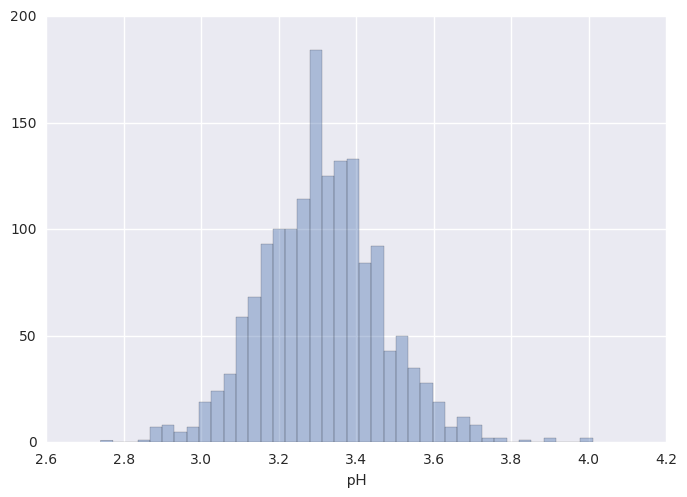

In [60]:
sns.distplot(df.pH, kde=False)

In [61]:
df.groupby('clusters8')['residual sugar'].mean()

clusters8
0    2.119512
1    2.545631
2    2.316000
3    2.357521
4    2.139841
5    1.989286
6    2.799127
7    9.532353
Name: residual sugar, dtype: float64

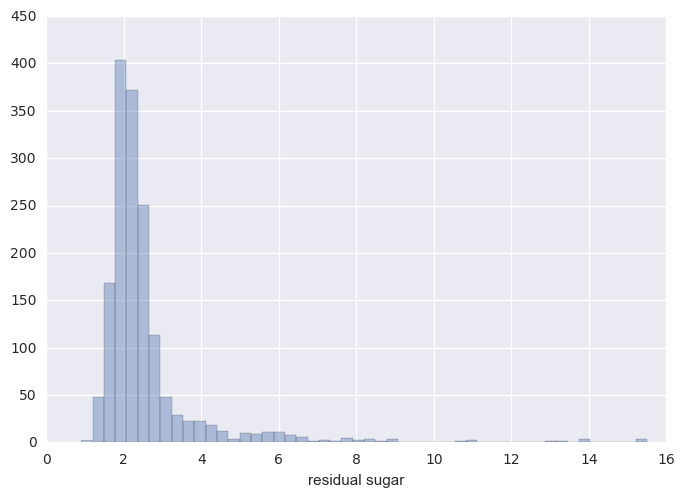

In [62]:
sns.distplot(df['residual sugar'], kde=False)

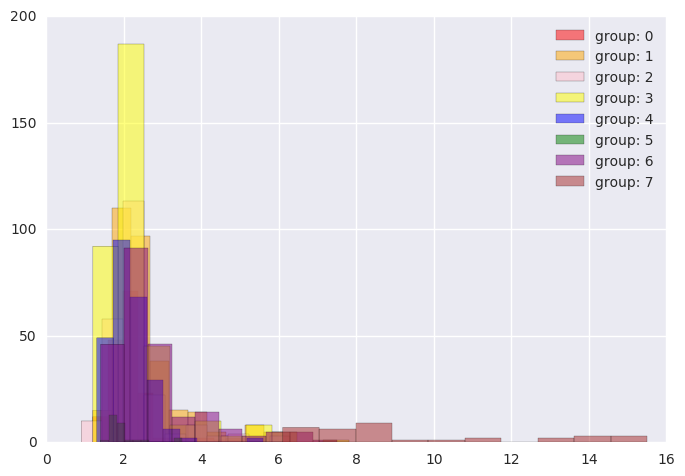

In [76]:
for x in zip(range(0,8), ['red', 'orange', 'pink', 'yellow', 'blue', 'green', 'purple', 'brown']):
    plt.hist(df.loc[(df.clusters8==x[0]), 'residual sugar'], 
             color=x[1], 
             alpha=0.5,
             label='group: ' + str(x[0])            
            )
plt.legend()

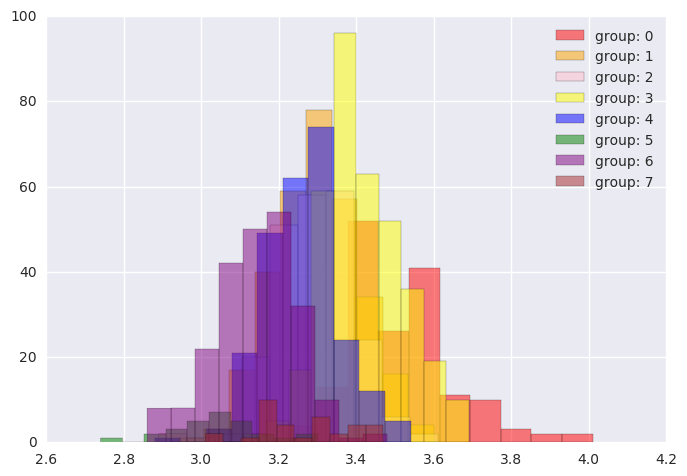

In [79]:
for x in zip(range(0,8), ['red', 'orange', 'pink', 'yellow', 'blue', 'green', 'purple', 'brown']):
    plt.hist(df.loc[(df.clusters8==x[0]), 'pH'], 
             color=x[1], 
             alpha=0.5,
             label='group: ' + str(x[0])            
            )
plt.legend()

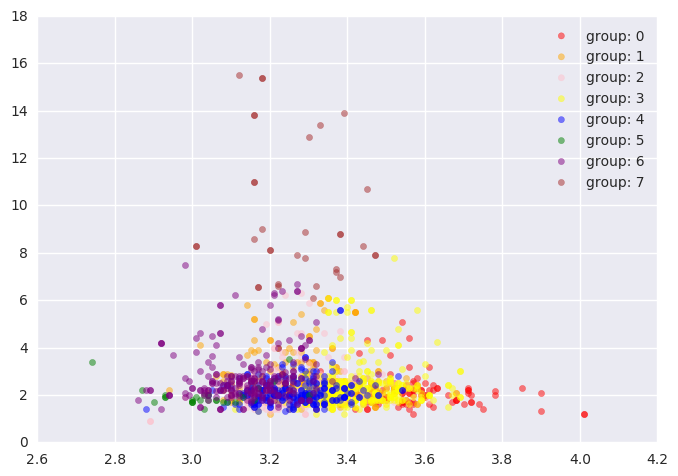

In [78]:
for x in zip(range(0,8), ['red', 'orange', 'pink', 'yellow', 'blue', 'green', 'purple', 'brown']):
    plt.scatter(df.loc[(df.clusters8==x[0]), 'pH'],
                df.loc[(df.clusters8==x[0]), 'residual sugar'] , color=x[1], alpha=0.5,
             label='group: ' + str(x[0])            
            )
plt.legend()

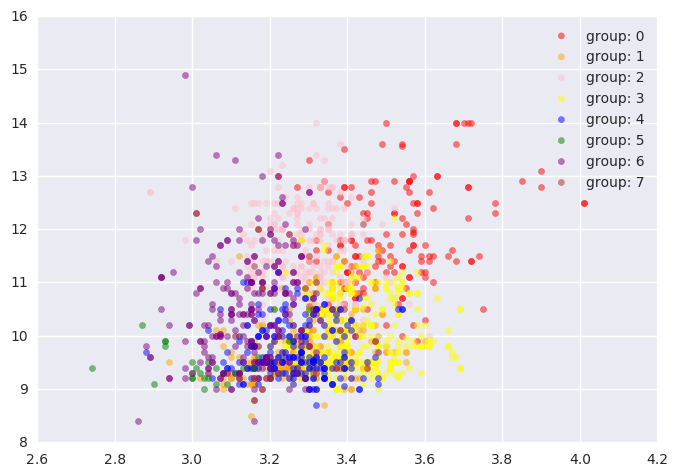

In [80]:
for x in zip(range(0,8), ['red', 'orange', 'pink', 'yellow', 'blue', 'green', 'purple', 'brown']):
    plt.scatter(df.loc[(df.clusters8==x[0]), 'pH'],
                df.loc[(df.clusters8==x[0]), 'alcohol'] , color=x[1], alpha=0.5,
             label='group: ' + str(x[0])            
            )
plt.legend()

In [85]:
df.loc[df.clusters8==7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,8.170588,0.521618,0.351765,9.532353,0.101412,34.176471,102.235294,0.999058,3.260882,0.654118,10.035294,5.617647,7.0
std,1.607469,0.169356,0.194897,2.943145,0.052125,17.798911,58.068955,0.002717,0.122583,0.158556,1.118138,0.779071,0.0
min,5.600000,0.280000,0.020000,6.100000,0.050000,3.000000,9.000000,0.993160,3.010000,0.480000,8.800000,4.000000,7.0
25%,6.800000,0.395000,0.207500,7.425000,0.070000,24.500000,76.750000,0.997928,3.170000,0.540000,9.200000,5.000000,7.0
50%,7.700000,0.500000,0.315000,8.300000,0.079000,30.500000,93.000000,0.999000,3.245000,0.590000,9.400000,5.500000,7.0
75%,9.900000,0.645000,0.447500,11.000000,0.116250,39.500000,121.000000,1.001300,3.370000,0.750000,10.800000,6.000000,7.0
max,10.700000,0.900000,0.780000,15.500000,0.235000,72.000000,289.000000,1.003690,3.470000,1.140000,12.300000,7.000000,7.0


In [86]:
silhouette_score(x_standard, predictions)

0.15130953210579565

In [88]:
list_of_scores=[]
for x in range(2, 25):
    kmeans=KMeans(x)
    kmeans.fit(x_standard)
    predictions=kmeans.predict(x_standard)
    sil=silhouette_score(x_standard, predictions)
    list_of_scores.append((x, sil))

In [89]:
list_of_scores

[(2, 0.21394174587789277),
 (3, 0.1892040681106866),
 (4, 0.20552955838608492),
 (5, 0.19022588728499829),
 (6, 0.19204851011160412),
 (7, 0.19004314272673026),
 (8, 0.15066966320924247),
 (9, 0.15239204658854699),
 (10, 0.1576345431464064),
 (11, 0.13436093503688731),
 (12, 0.13389935370404957),
 (13, 0.14076127039607614),
 (14, 0.13990585749861581),
 (15, 0.14191484171201951),
 (16, 0.13719324710795383),
 (17, 0.14183690557032017),
 (18, 0.13486124527123822),
 (19, 0.14474721985100042),
 (20, 0.13452833081963897),
 (21, 0.14588527909722745),
 (22, 0.14595786080297371),
 (23, 0.1512921878628298),
 (24, 0.14277717489594874)]

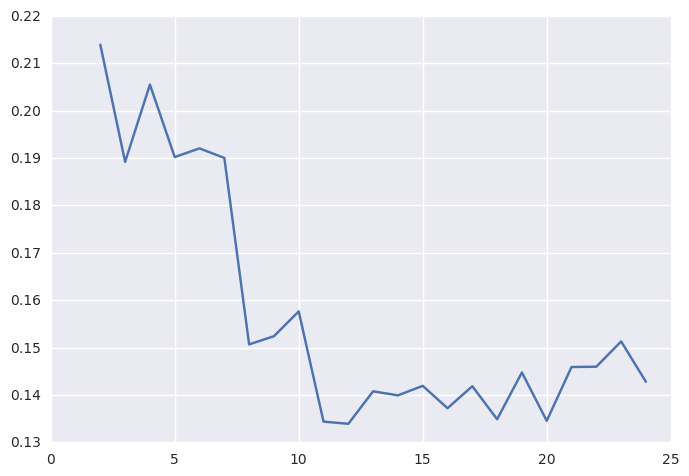

In [94]:
plt.plot([x[0] for x in list_of_scores], [x[1] for x in list_of_scores])

In [95]:
df.shape

(1599, 13)

#### Best k is 4 based on plot

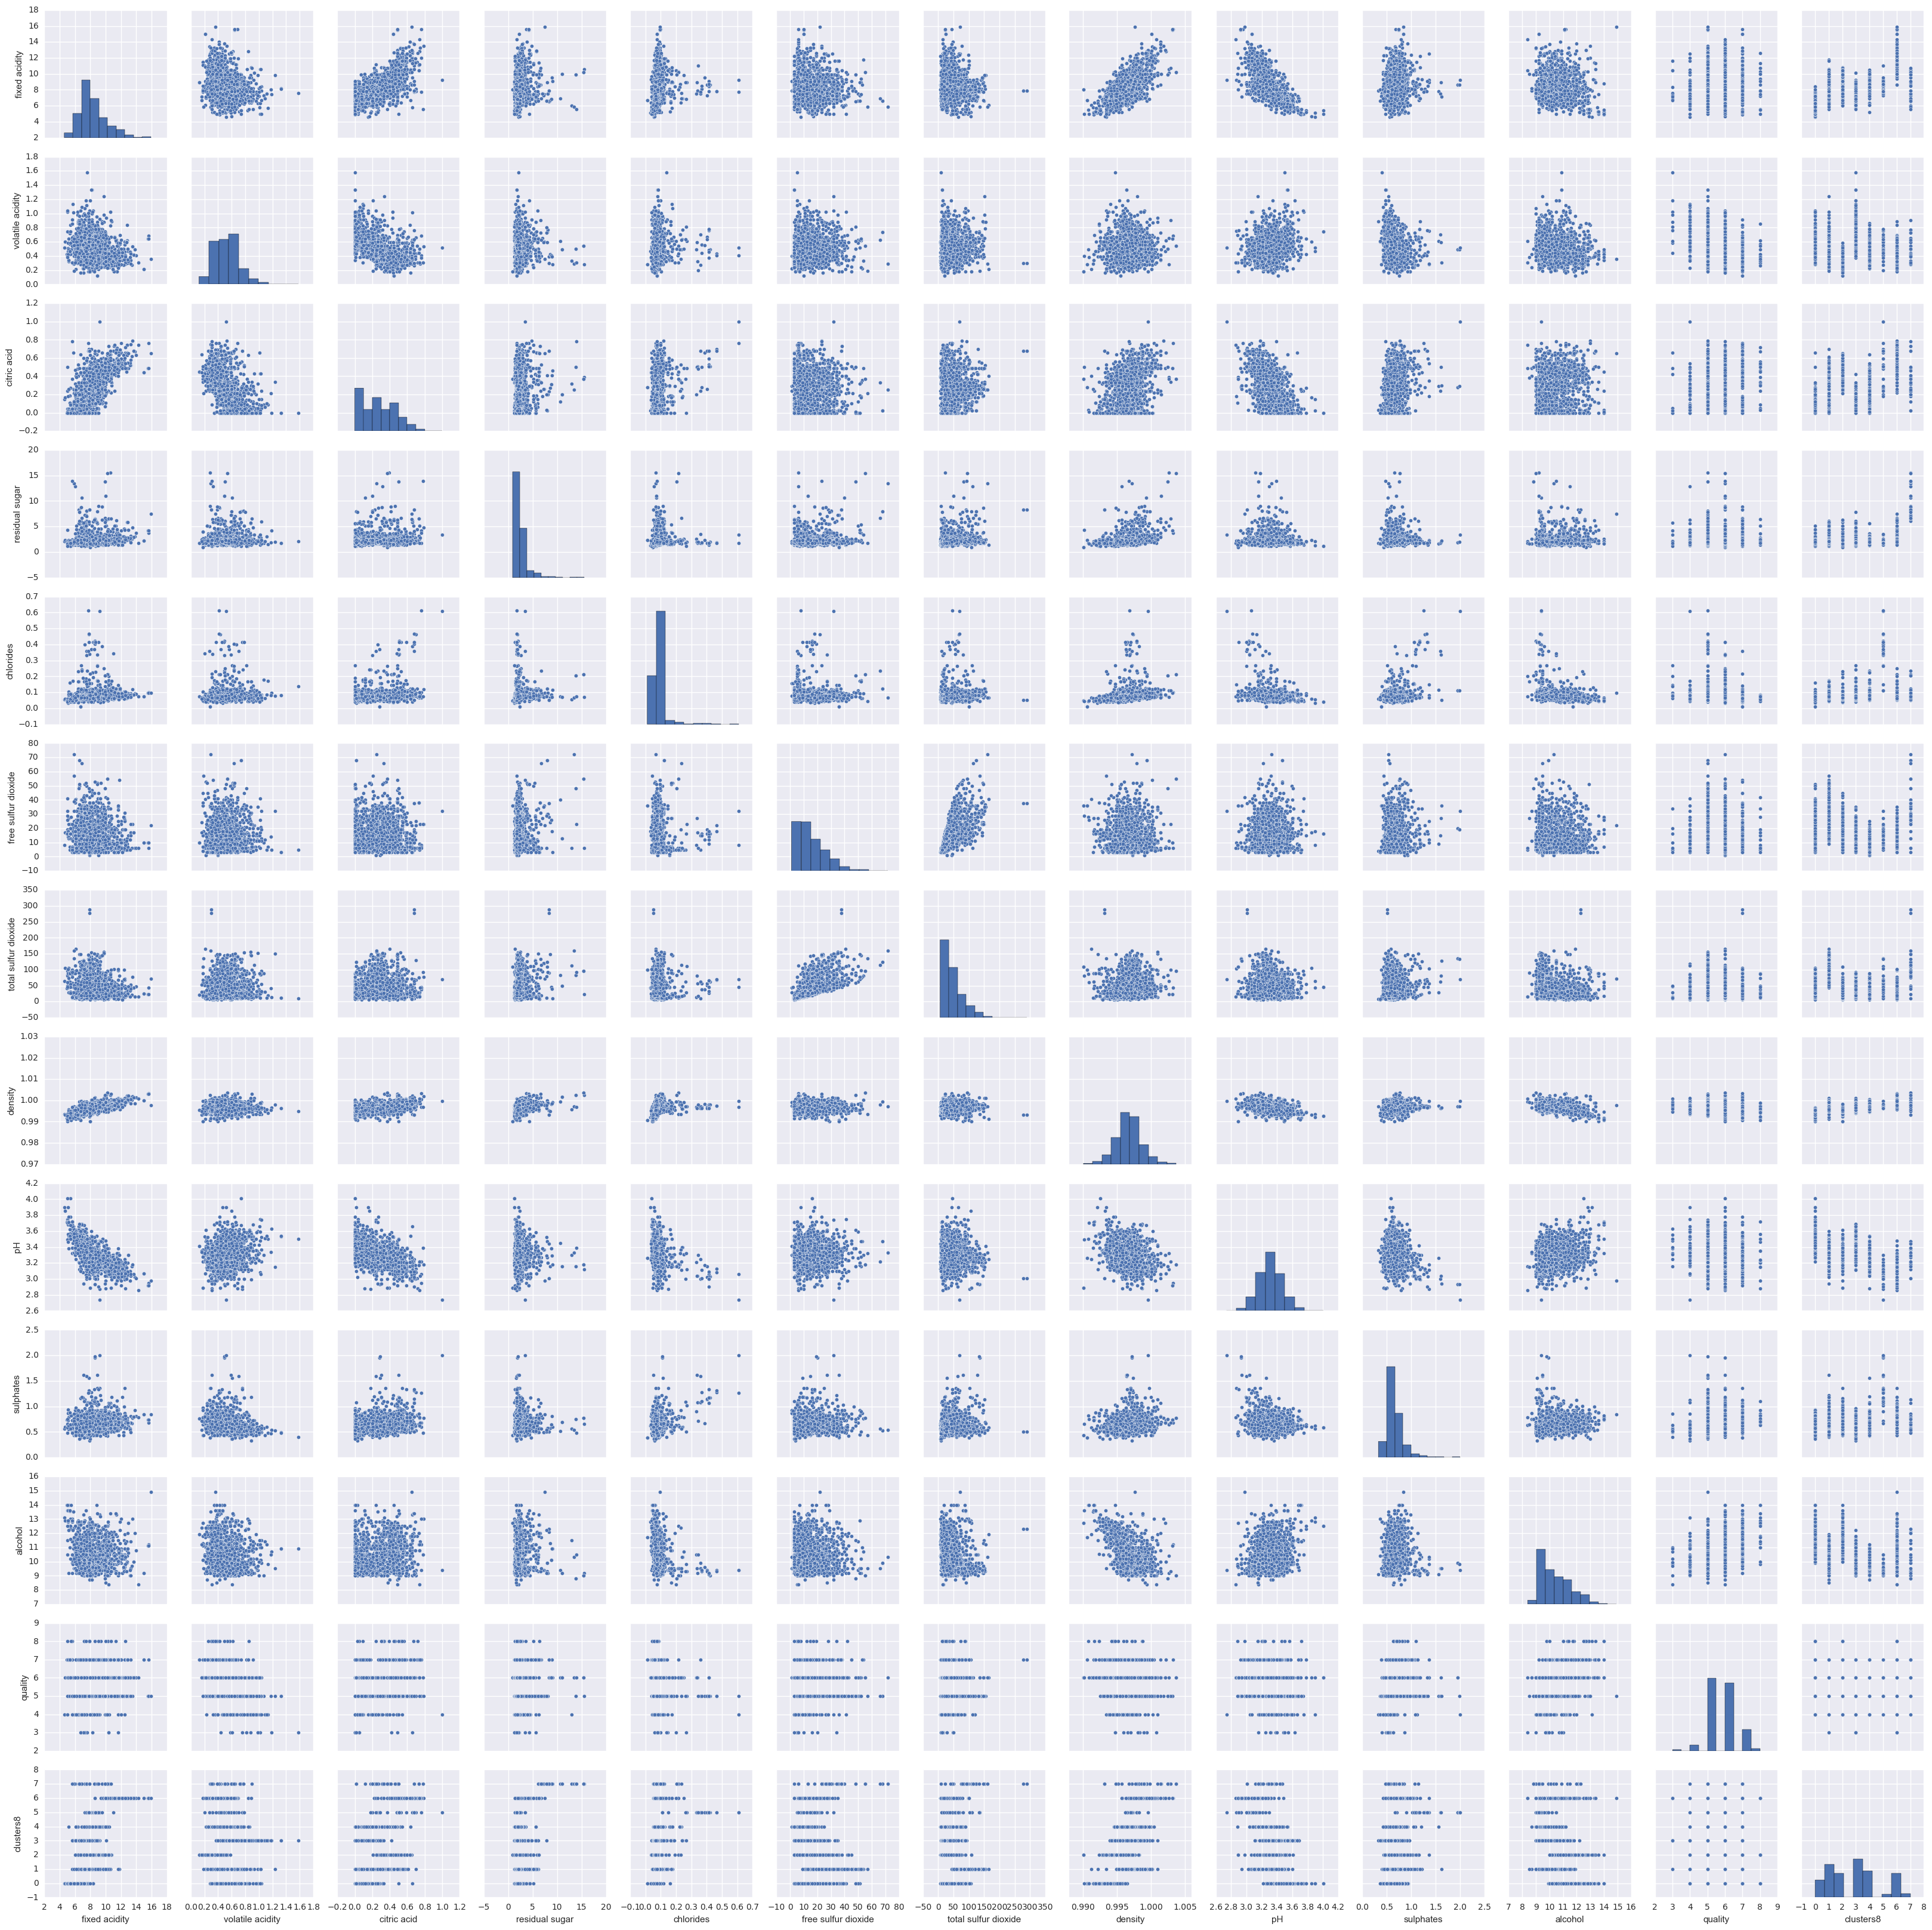

In [97]:
sns.pairplot(df)

In [100]:
final_model = KMeans(4)
final_model.fit(x_standard)
set(final_model.labels_)

{0, 1, 2, 3}

In [101]:
df['classes_final']=pd.DataFrame(final_model.labels_)

In [102]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8,classes_final
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,3,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3,3


In [103]:
df.classes_final.value_counts()

3    556
0    395
1    334
2    314
Name: classes_final, dtype: int64

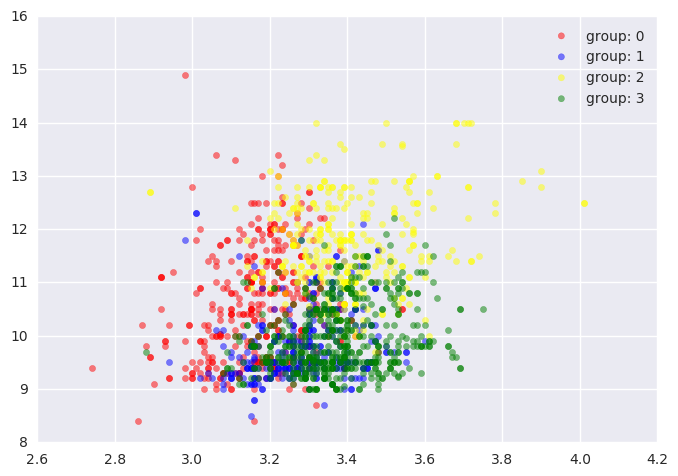

In [106]:
for x in zip(range(0,4), ['red', 'blue', 'yellow', 'green']):
    plt.scatter(df.loc[(df.classes_final==x[0]), 'pH'],
                df.loc[(df.classes_final==x[0]), 'alcohol'] , color=x[1], alpha=0.5,
             label='group: ' + str(x[0])            
            )
plt.legend()

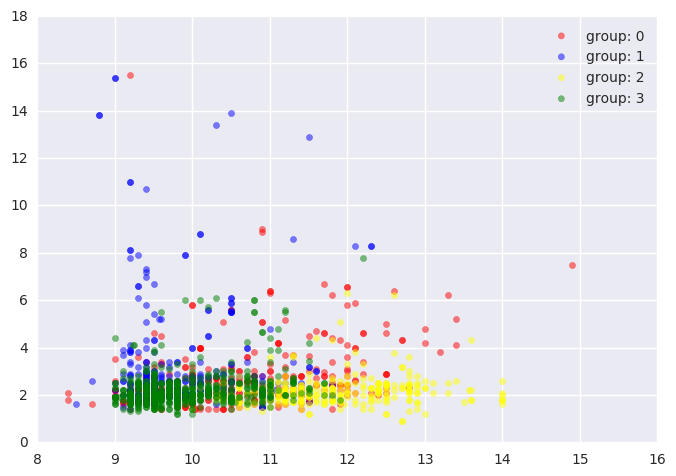

In [107]:
for x in zip(range(0,4), ['red', 'blue', 'yellow', 'green']):
    plt.scatter(df.loc[(df.classes_final==x[0]), 'alcohol'],
                df.loc[(df.classes_final==x[0]), 'residual sugar'] , color=x[1], alpha=0.5,
             label='group: ' + str(x[0])            
            )
plt.legend()

In [176]:
def graph_pairwise(x_col, y_col):
    for x in zip(range(0,4), ['red', 'blue', 'yellow', 'green']):
        plt.scatter(df.loc[(df.classes_final==x[0]), x_col],
                    df.loc[(df.classes_final==x[0]), y_col] , color=x[1], alpha=0.5,
                 label='group: ' + str(x[0])            
                )
    plt.title('Plotting %s by %s' % (x_col, y_col))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

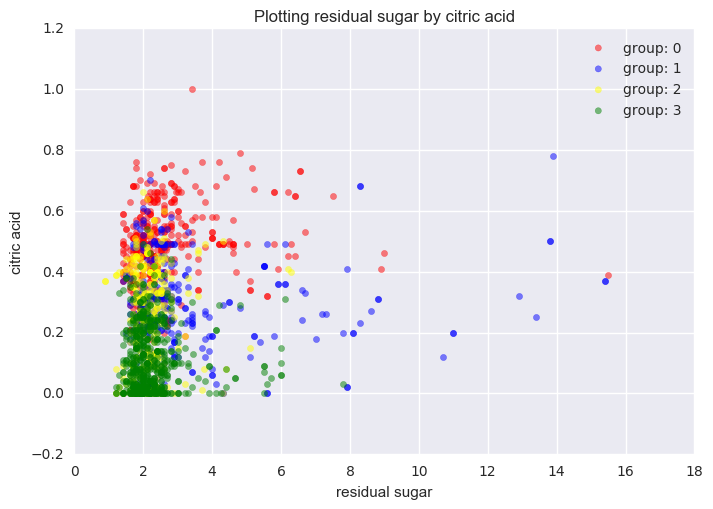

In [117]:
graph_pairwise('residual sugar', 'citric acid')

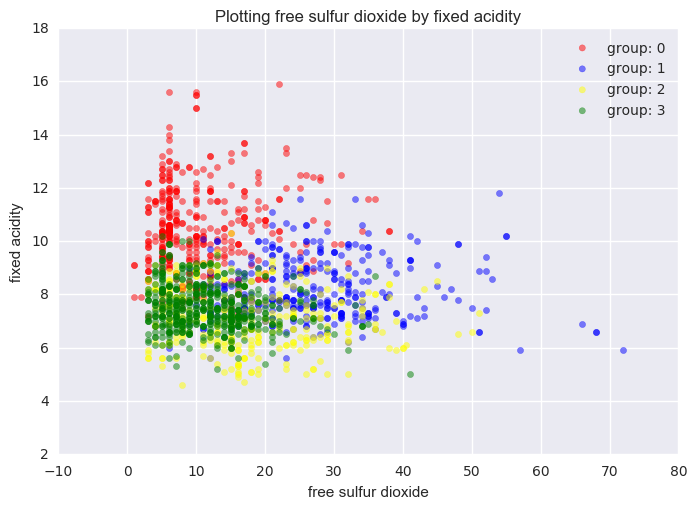

In [118]:
graph_pairwise('free sulfur dioxide', 'fixed acidity')

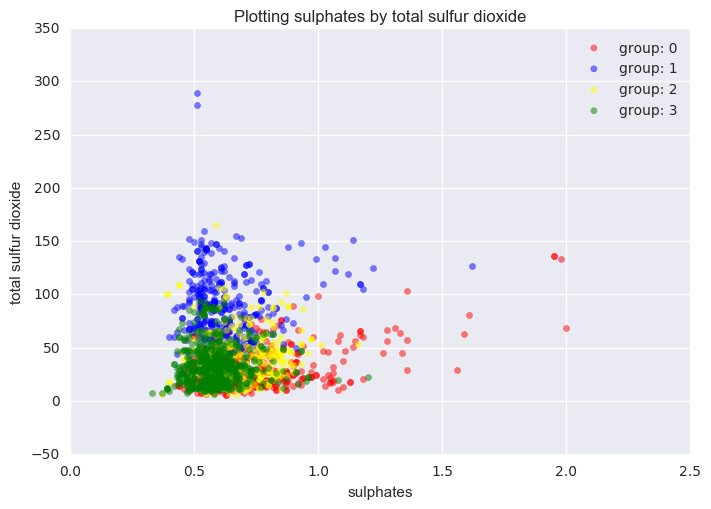

In [119]:
graph_pairwise('sulphates', 'total sulfur dioxide')

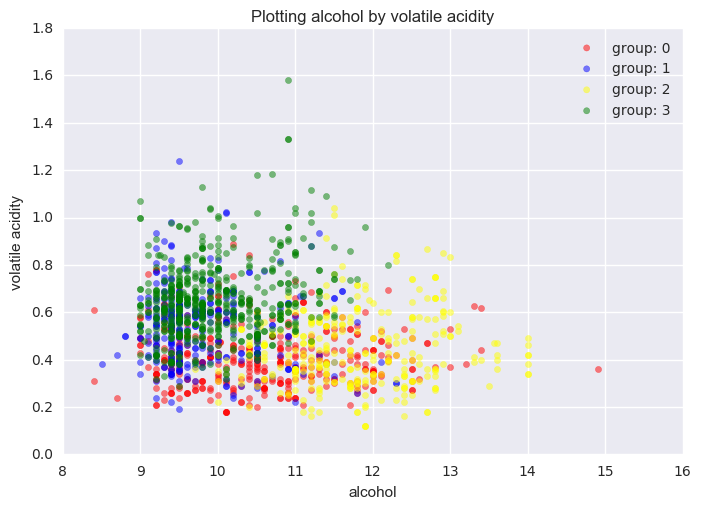

In [120]:
graph_pairwise('alcohol', 'volatile acidity')

In [151]:
from sklearn.datasets import load_iris
iris=load_iris()
y=pd.DataFrame(iris['target'], columns=['flower'])
x=pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [152]:
y.head()

,flower
0,0
1,0
2,0
3,0
4,0


In [153]:
df=x.join(y)

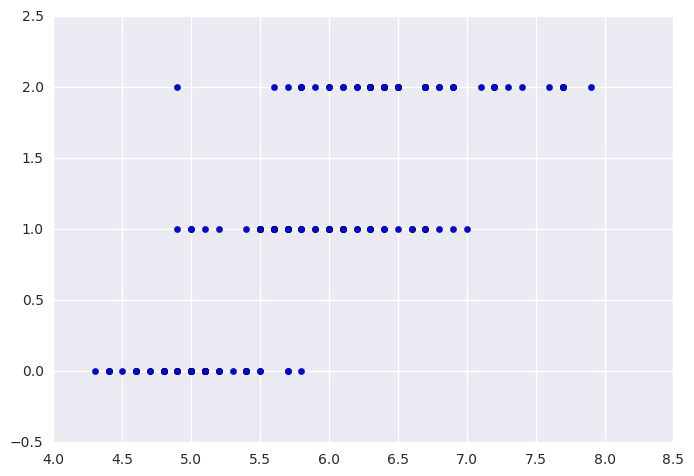

In [155]:
plt.scatter(x['sepal length (cm)'], y)

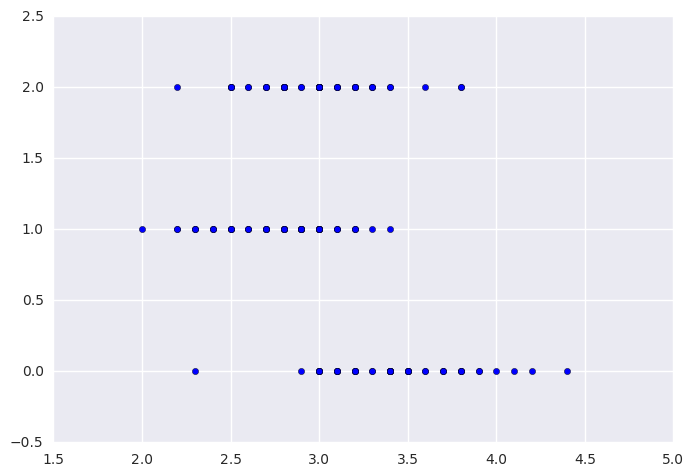

In [156]:
plt.scatter(x['sepal width (cm)'], y)

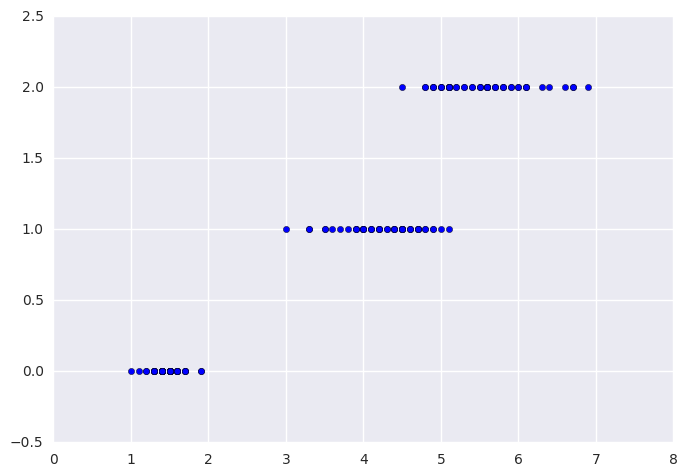

In [157]:
plt.scatter(x['petal length (cm)'], y)

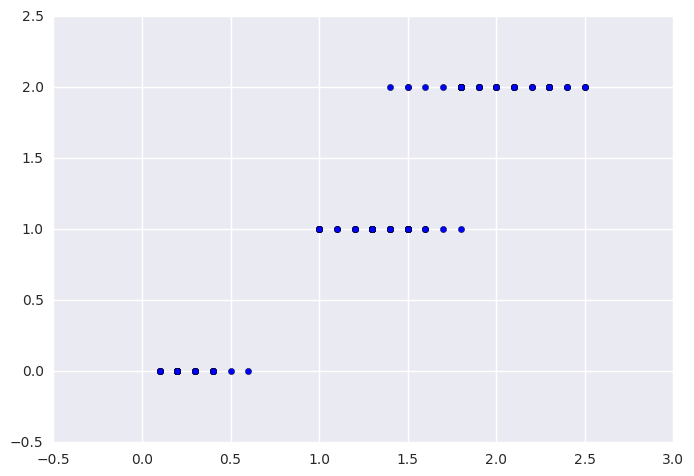

In [158]:
plt.scatter(x['petal width (cm)'], y)

In [159]:
x_standard = StandardScaler().fit_transform(x)

In [160]:
k=8
kmeans=KMeans(n_clusters=k)
kmeans.fit(x_standard)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [161]:
list_of_scores=[]
for x in range(2, 25):
    kmeans=KMeans(x)
    kmeans.fit(x_standard)
    predictions=kmeans.predict(x_standard)
    sil=silhouette_score(x_standard, predictions)
    list_of_scores.append((x, sil))

In [162]:
list_of_scores

[(2, 0.58018446325739603),
 (3, 0.45897178670187183),
 (4, 0.38724679456128808),
 (5, 0.34767483142797462),
 (6, 0.35620806972291846),
 (7, 0.33910723476456234),
 (8, 0.33582080096383959),
 (9, 0.35516044124261997),
 (10, 0.3549729010283757),
 (11, 0.3593097793945465),
 (12, 0.35720205714324987),
 (13, 0.35534906918122339),
 (14, 0.34596644087442996),
 (15, 0.32537291034383165),
 (16, 0.34191896338340411),
 (17, 0.33260506251716254),
 (18, 0.34843358632158117),
 (19, 0.34663138266567767),
 (20, 0.35079469161768645),
 (21, 0.30403384649749321),
 (22, 0.33539313501595197),
 (23, 0.29877200227381512),
 (24, 0.32506421447995437)]

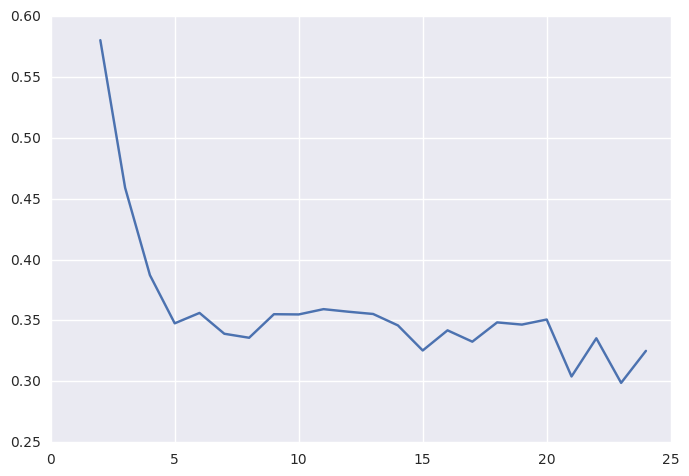

In [163]:
plt.plot([x[0] for x in list_of_scores], [x[1] for x in list_of_scores])

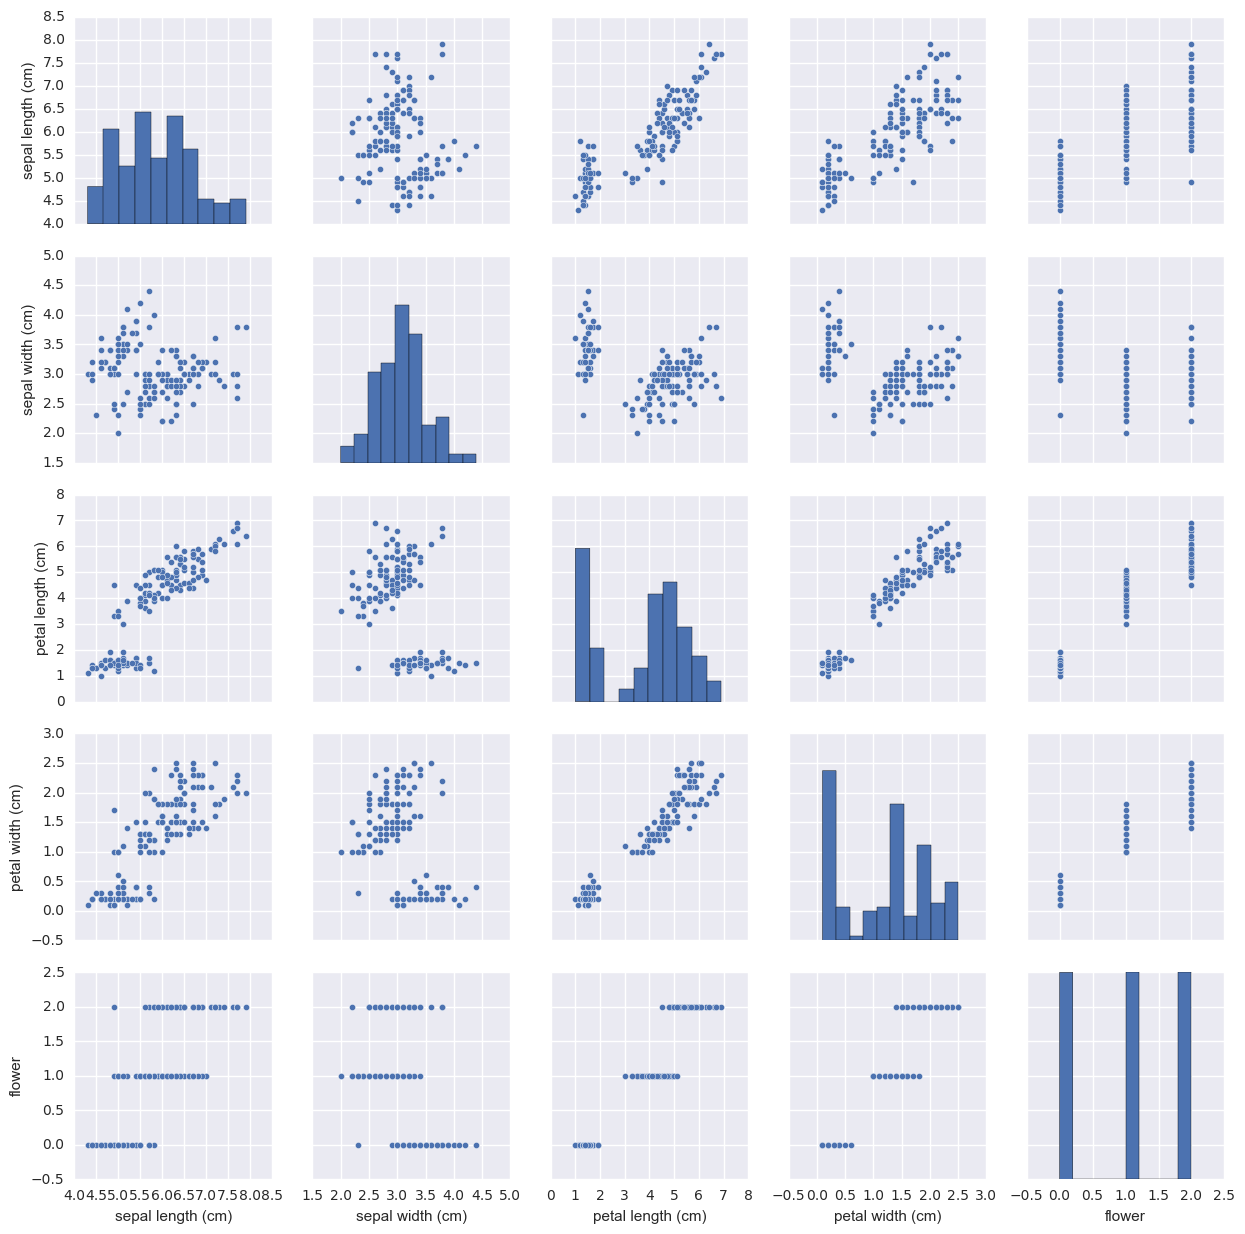

In [164]:
sns.pairplot(df)

In [171]:
final_model = KMeans(4)
final_model.fit(x_standard)
set(final_model.labels_)

{0, 1, 2, 3}

In [172]:
final_model.labels_

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1,
       3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int32)

In [173]:
df['classes_final']=pd.DataFrame(final_model.labels_)

In [174]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,classes_final
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,2
5,5.4,3.9,1.7,0.4,0,2
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,2
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


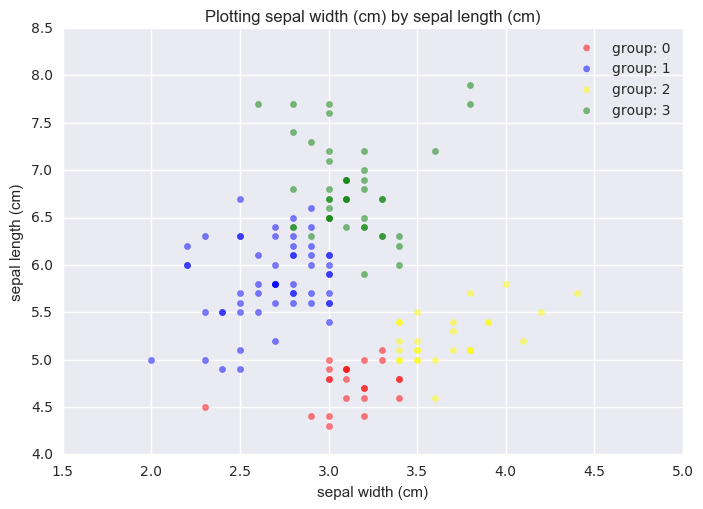

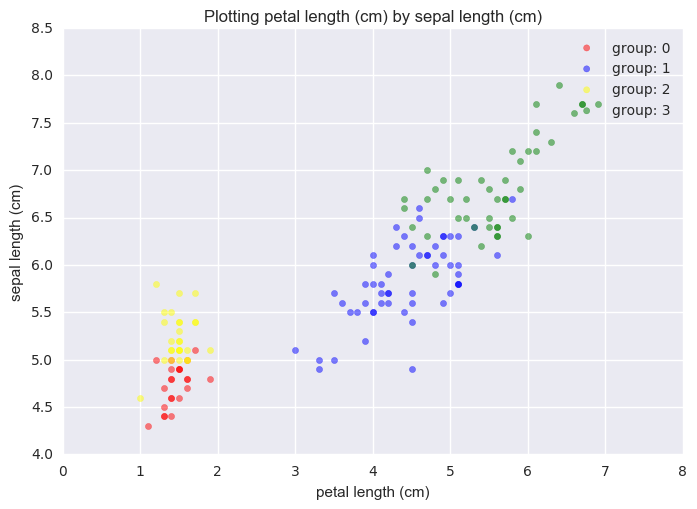

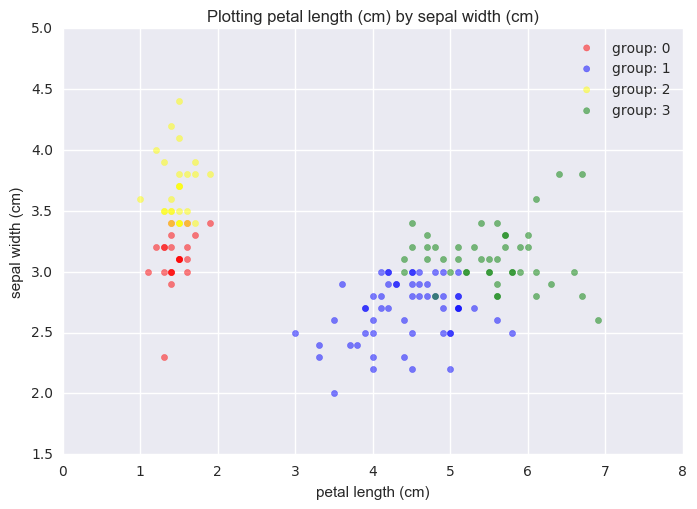

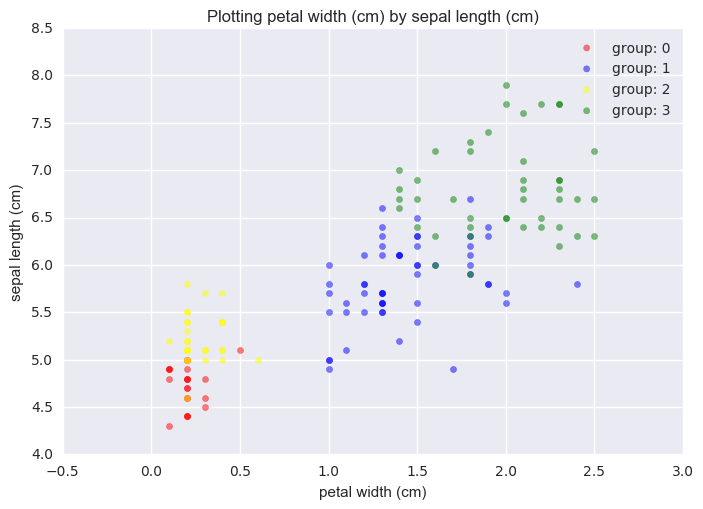

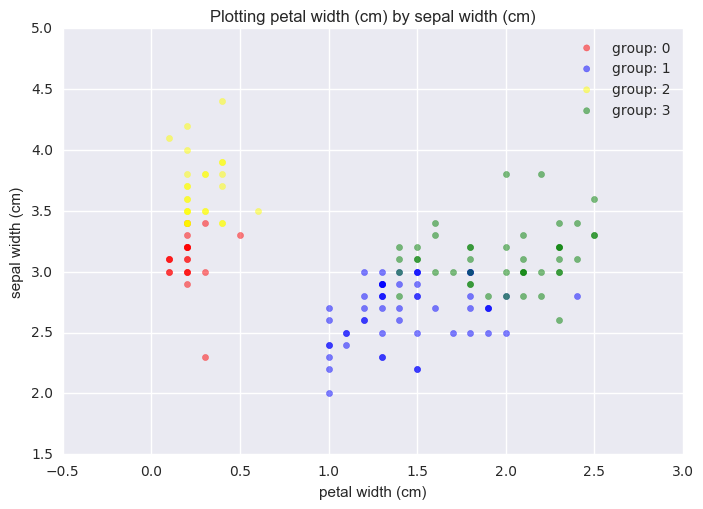

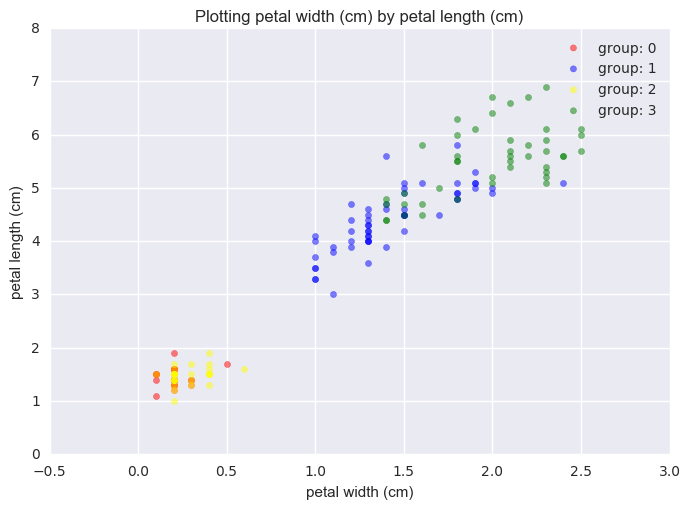

In [177]:
for i in range(0, 4):
    for j in range(0, 4):
        if i>j:
            graph_pairwise(df.columns[i], df.columns[j])